## Feedbacks step-by-step
Doing this on my own to test my confidence.

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, re
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [9]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
fb_dir ='feedbacks_soden/mod_by_me/output_jonahks/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(fb_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


In [15]:
os.chdir('jonahks/feedbacks_soden/mod_by_me/timeseriesinput/')

In [16]:
os.listdir()

['CAM61_satcomp_wbf_1_inp_1',
 'NorESM2-LM',
 'CAM61_satcomp_wbf_0.2_inp_0.1',
 'CAM61_satcomp_wbf_0.5_inp_0.5',
 'CAM6_satcomp_FLDSC_wbf_1_inp_1',
 'CAM6_Fvars_check',
 'CAM6_satcomp_wbf_1.25_inp_10',
 'NorESM2-MM',
 'CAM6_satcomp_wbf_1_inp_1']

## Calculate the Albedo

Read in surface flux variables, calculate the upwelling clearsky value.

Standard run.

In [28]:
rsdscs = xr.open_dataset('CAM6_satcomp_wbf_1_inp_1/20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1/20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1_h0_FSDSC_2010-2012.nc')

rsnscs = xr.open_dataset('CAM6_satcomp_wbf_1_inp_1/20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1/20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1_h0_FSNSC_2010-2012.nc')

rsuscs = rsdscs['FSDSC'] - rsnscs['FSNSC']


In [55]:
acs_raw = rsuscs/rsdscs['FSDSC']

In [56]:
# Get monthly averages
acs_mon = acs_raw.groupby('time.month').mean('time')

Perturbed run.

In [48]:
rsdscs_ = xr.open_dataset('CAM6_satcomp_wbf_1_inp_1/20200817_4Ksst_cam6satcomp_wbf_1_inp_1/20200817_4Ksst_cam6satcomp_wbf_1_inp_1_h0_FSDSC_2010-2012.nc')

rsnscs_ = xr.open_dataset('CAM6_satcomp_wbf_1_inp_1/20200817_4Ksst_cam6satcomp_wbf_1_inp_1/20200817_4Ksst_cam6satcomp_wbf_1_inp_1_h0_FSNSC_2010-2012.nc')

rsuscs_ = rsdscs_['FSDSC'] - rsnscs_['FSNSC']


In [57]:
acs_raw_ = rsuscs_/rsdscs_['FSDSC']

In [58]:
# Get monthly averages
acs_mon_ = acs_raw_.groupby('time.month').mean('time')

Calculate the change in the monthly albedo:

In [59]:
d_acs = acs_mon_ - acs_mon

Adjust dimension names so that they match.

In [79]:
d_acs = d_acs.rename({'month': 'time'})

Read in the kernel.

In [65]:
swcs_a_kern = xr.open_dataset('../kernels/TOA_GFDL/swclr_a_gfdl_toa.nc')

In [81]:
# Interpolated albedo change to the kernel grid.
d_acs_temp = d_acs.interp_like(swcs_a_kern)

In [1]:
# Index-wise multiplication between the perturbation and the kernel:
dF = d_acs_temp * swcs_a_kern

NameError: name 'd_acs_temp' is not defined

Test the albedo change by plotting the monthly maps, looks good.

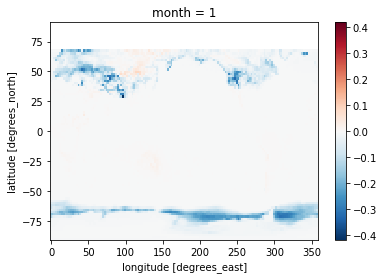

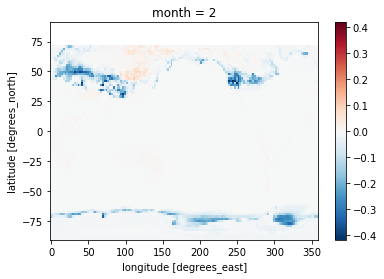

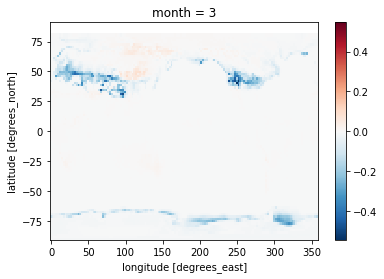

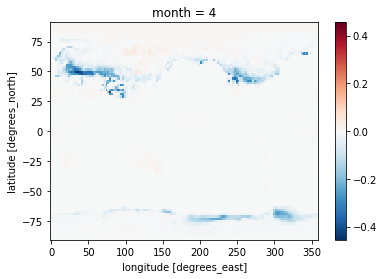

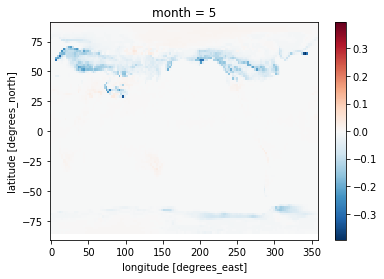

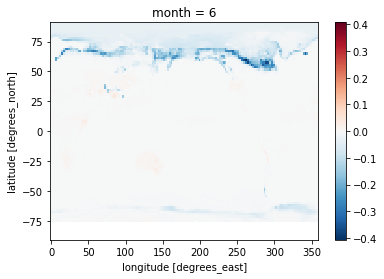

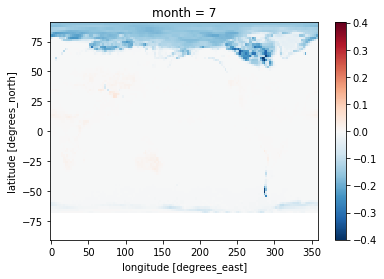

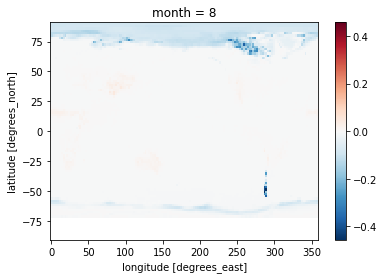

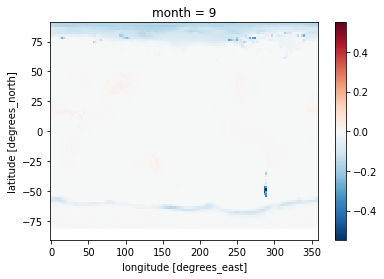

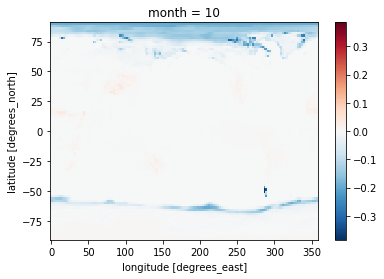

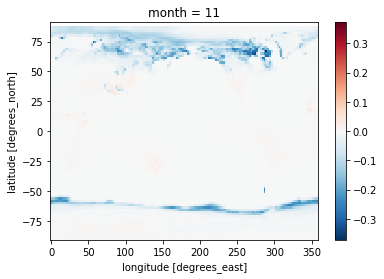

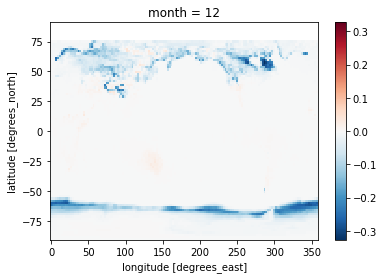

In [60]:
for i,month in enumerate(d_acs):
    plt.figure()
    month[:,:].plot()

Test the albedo by plotting the monthly maps.

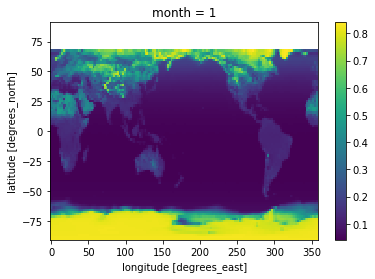

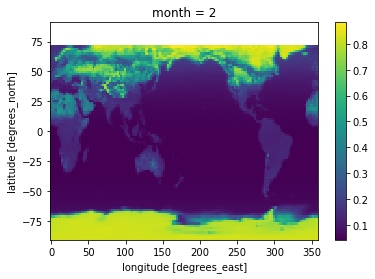

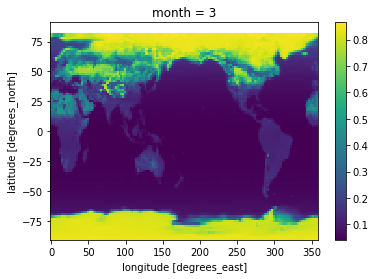

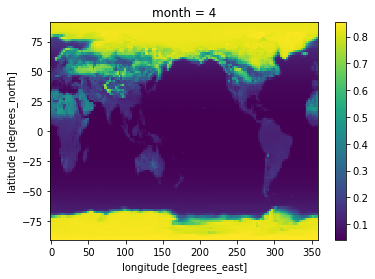

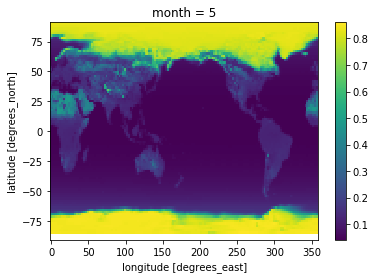

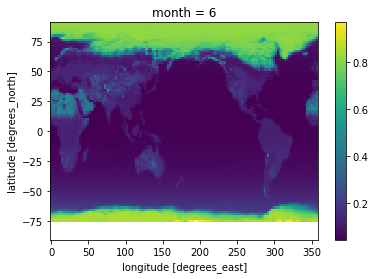

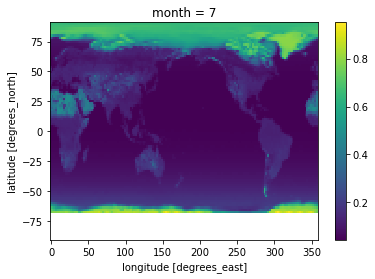

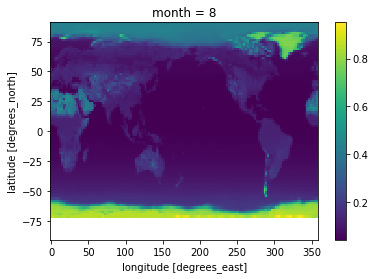

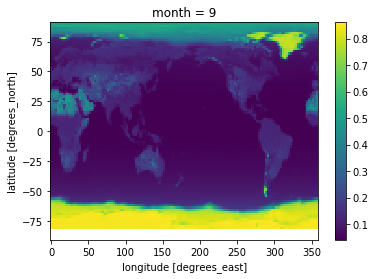

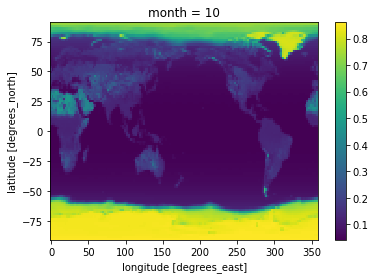

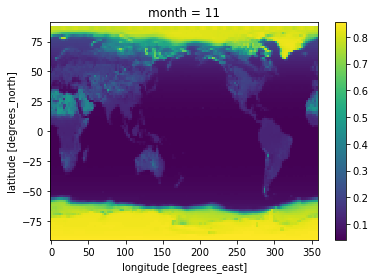

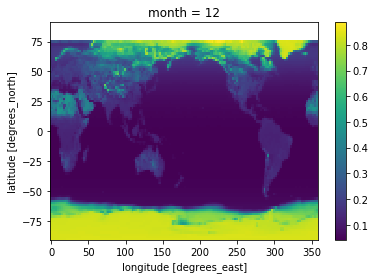

In [51]:
for i,month in enumerate(acs_mon_):
    plt.figure()
    month[:,:].plot()

In [ ]:
rsnscs['FSNSC'][0,:,:].plot()

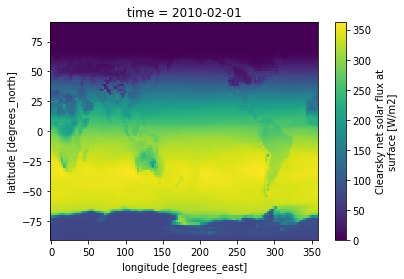

In [25]:
rsnscs['FSNSC'][0,:,:].plot()

In [ ]:
xr.open_dataset('CAM6_satcomp_wbf_1_inp_1/20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1/20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1_h0_TS_2010-2012.nc')